In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

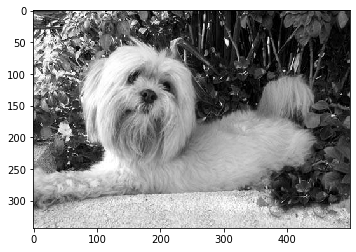

In [3]:
DATADIR='dataset/training_set/'
CATEGORIES=['dogs','cats']
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)#path to cat and dog dir
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array,cmap='gray')
            plt.show()
            break
    break        


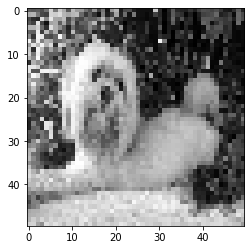

In [6]:
IMG_SIZE=50
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
#making training dataseti
training_data=[]
def create_training_dataset():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
                
          

In [8]:
create_training_dataset()

In [9]:
print(len(training_data))

8000


In [10]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
0
0
1
1


In [14]:
X=[]
y=[]



In [15]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
#now we need to save this data as we don't want to do this again each time
#you can use many method i am using python pickle library
import pickle
pickle_out=open("X.pickle","wb")
#       file name in save   mode write byte
pickle.dump(X,pickle_out)
#putting the data/pickle in file
pickle_out.close()
#closing the file
#same for y
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
#now if you want to open that pickle file again
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
#loading the pickle_in object in X
X[1]

array([[[102],
        [108],
        [ 44],
        ...,
        [ 79],
        [ 98],
        [127]],

       [[115],
        [115],
        [105],
        ...,
        [ 79],
        [128],
        [102]],

       [[123],
        [127],
        [102],
        ...,
        [136],
        [ 66],
        [101]],

       ...,

       [[161],
        [175],
        [172],
        ...,
        [ 78],
        [ 81],
        [ 55]],

       [[158],
        [176],
        [188],
        ...,
        [ 85],
        [ 78],
        [ 44]],

       [[159],
        [162],
        [172],
        ...,
        [ 89],
        [ 68],
        [ 40]]], dtype=uint8)

In [ ]:
#THIS IS FOR NOW WE WILL USE THIS PICKLE FILE TO LOAD IN OUR NEURAL NETOWRK